In [4]:
import cv2
import numpy as np

# Leer imagen nocturna
img = cv2.imread("foto4_original.png")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 1. Denoising
den = cv2.bilateralFilter(img_rgb, 9, 75, 75)

# 2. Gamma correction
gamma = 0.5
img_gamma = np.power(den / 255.0, gamma)
img_gamma = np.uint8(img_gamma * 255)

# 3. CLAHE en canal luminancia
lab = cv2.cvtColor(img_gamma, cv2.COLOR_BGR2LAB)
l, a, b = cv2.split(lab)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
l_clahe = clahe.apply(l)

lab = cv2.merge((l_clahe, a, b))
final = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

# 4. Normalización
final = cv2.normalize(final, None, 0, 255, cv2.NORM_MINMAX)

cv2.imwrite("foto4_procesada.png", final)

True

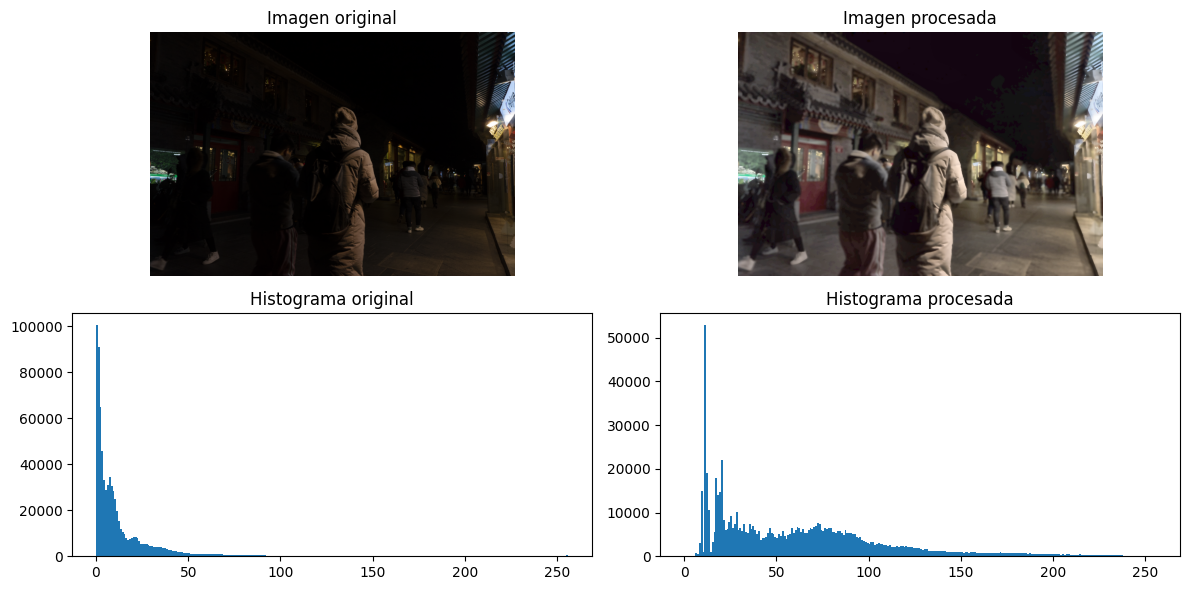

In [5]:
import matplotlib.pyplot as plt

gray_orig = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
gray_proc = cv2.cvtColor(final, cv2.COLOR_RGB2GRAY)
# --- Crear figura ---
plt.figure(figsize=(12, 6))

# Fila 1 - Imágenes
plt.subplot(2, 2, 1)
plt.imshow(img_rgb)
plt.title("Imagen original")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(final)
plt.title("Imagen procesada")
plt.axis("off")

# Fila 2 - Histogramas
plt.subplot(2, 2, 3)
plt.hist(gray_orig.ravel(), bins=256, range=[0,256])
plt.title("Histograma original")

plt.subplot(2, 2, 4)
plt.hist(gray_proc.ravel(), bins=256, range=[0,256])
plt.title("Histograma procesada")

plt.tight_layout()
plt.show()